In [2]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np

In [12]:
df_btc = fdr.DataReader('BTC/KRW','20200101','20241219')
df_eth = fdr.DataReader('ETH/KRW','20200101','20241219')

In [13]:
# 특정 열을 실수형으로 변환한 후 포맷팅
#columns_to_format = ['Open', 'High', 'Low', 'Close', 'Adj Close']

#df_btc[columns_to_format] = df_btc[columns_to_format].astype(float).apply(lambda col: col.map('{:.2f}'.format))
#df_eth[columns_to_format] = df_eth[columns_to_format].astype(float).apply(lambda col: col.map('{:.2f}'.format))

In [14]:
df_btc

,Open,High,Low,Close,Volume,Adj Close
2019-12-31,8442219.0,8467419.0,8288191.0,8306736.5,24443474093713,8306736.5
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,21442786101341,8315985.5
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,24073835152756,8084144.5
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,32774051275895,8563107.0
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,21503438108393,8639788.0
...,...,...,...,...,...,...
2024-12-14,143092608.0,146241408.0,142209888.0,145639680.0,81669571160034,145639680.0
2024-12-15,145628464.0,147304272.0,144455152.0,145515824.0,58025150553973,145515824.0
2024-12-16,145516640.0,150790736.0,145306336.0,149715808.0,73417522999869,149715808.0
2024-12-17,149708464.0,155020160.0,148400736.0,152258672.0,130705319984905,152258672.0


In [15]:
df_eth

,Open,High,Low,Close,Volume,Adj Close
2019-12-31,1.534788e+05,1.543904e+05,1.488900e+05,1.496668e+05,10319757102861,1.496668e+05
2020-01-01,1.496897e+05,1.533916e+05,1.491917e+05,1.510724e+05,9164952974789,1.510724e+05
2020-01-02,1.510932e+05,1.510932e+05,1.469224e+05,1.474492e+05,9296093767872,1.474492e+05
2020-01-03,1.474505e+05,1.568711e+05,1.467449e+05,1.564254e+05,12214534929174,1.564254e+05
2020-01-04,1.564217e+05,1.586184e+05,1.551067e+05,1.574720e+05,8663394337968,1.574720e+05
...,...,...,...,...,...,...
2024-12-14,5.553738e+06,5.689286e+06,5.519834e+06,5.614340e+06,50090210997460,5.614340e+06
2024-12-15,5.613826e+06,5.660378e+06,5.493126e+06,5.552902e+06,41278073737831,5.552902e+06
2024-12-16,5.552954e+06,5.700896e+06,5.500783e+06,5.672823e+06,35986240789313,5.672823e+06
2024-12-17,5.672409e+06,5.906411e+06,5.578576e+06,5.726023e+06,66826212485098,5.726023e+06


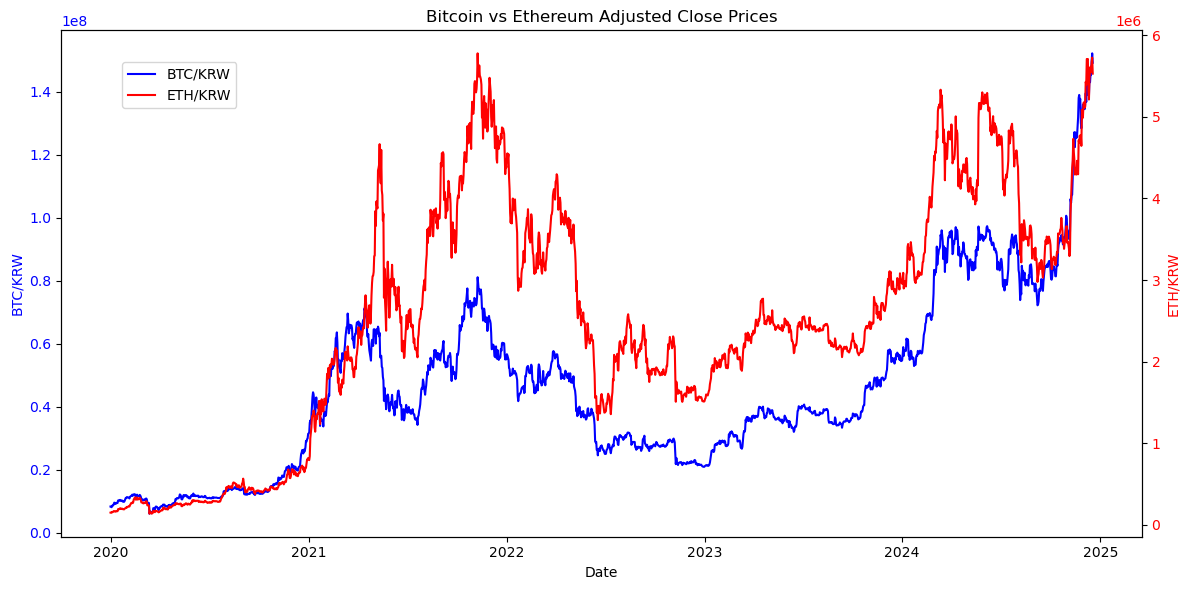

In [16]:
# 차트 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 좌측 축에 비트코인 데이터 플롯
ax1.plot(df_btc.index, df_btc['Adj Close'], 'b-', label='BTC/KRW')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC/KRW', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 우측 축 생성 및 이더리움 데이터 플롯
ax2 = ax1.twinx()
ax2.plot(df_eth.index, df_eth['Adj Close'], 'r-', label='ETH/KRW')
ax2.set_ylabel('ETH/KRW', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 차트 제목 설정
plt.title('Bitcoin vs Ethereum Adjusted Close Prices')

# 범례 추가
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 차트 표시
plt.show()

In [17]:
# 일 수익률 계산
df_btc['Daily Return'] = df_btc['Adj Close'].pct_change()
df_eth['Daily Return'] = df_eth['Adj Close'].pct_change()

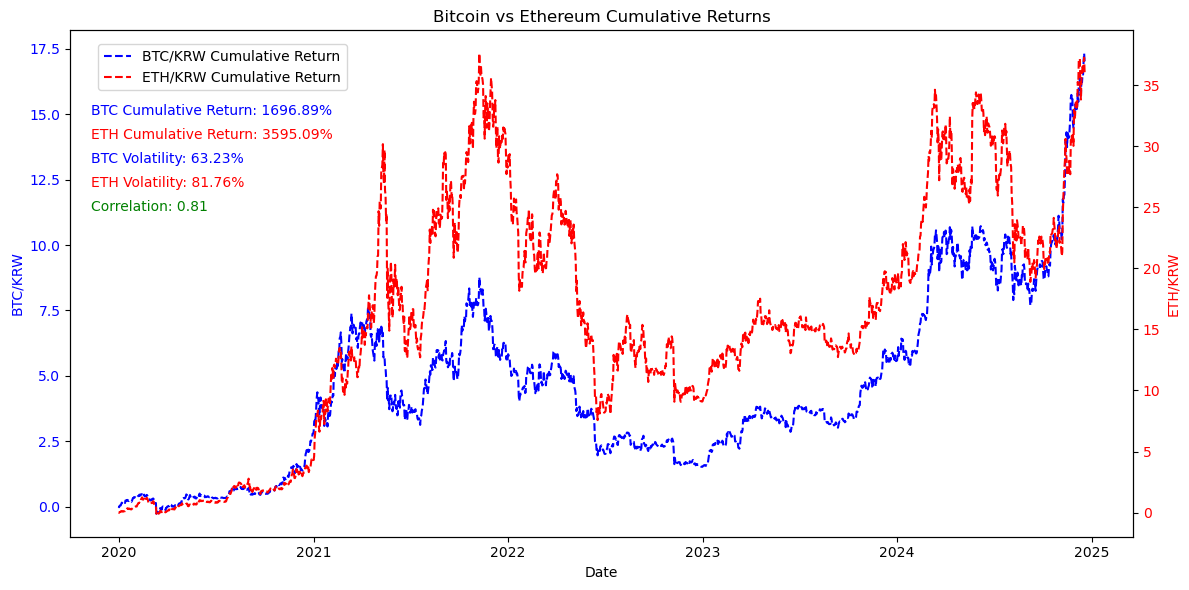

In [18]:
# 일 수익률 계산 및 컬럼 추가
df_btc['Daily Return'] = df_btc['Adj Close'].pct_change()
df_eth['Daily Return'] = df_eth['Adj Close'].pct_change()

# 누적 수익률 계산 및 컬럼 추가
df_btc['Cumulative Return'] = (1 + df_btc['Daily Return']).cumprod() - 1
df_eth['Cumulative Return'] = (1 + df_eth['Daily Return']).cumprod() - 1

# 변동성 계산 (Annualized Volatility)
df_btc_volatility = df_btc['Daily Return'].std() * np.sqrt(365) * 100
df_eth_volatility = df_eth['Daily Return'].std() * np.sqrt(365) * 100

# 일 수익률 상관계수 계산
correlation = df_btc['Daily Return'].corr(df_eth['Daily Return'])

# 차트 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 좌측 축에 비트코인 누적 수익률 플롯
ax1.plot(df_btc.index, df_btc['Cumulative Return'], 'b--', label='BTC/KRW Cumulative Return')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC/KRW', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 우측 축 생성 및 이더리움 누적 수익률 플롯
ax2 = ax1.twinx()
ax2.plot(df_eth.index, df_eth['Cumulative Return'], 'r--', label='ETH/KRW Cumulative Return')
ax2.set_ylabel('ETH/KRW', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 차트 제목 설정
plt.title('Bitcoin vs Ethereum Cumulative Returns')

# 범례 추가
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.08, 0.93))

# 텍스트를 차트 맨 위에 추가
plt.figtext(0.08, 0.8, f'BTC Cumulative Return: {df_btc["Cumulative Return"].iloc[-1]*100:.2f}%', color='blue')
plt.figtext(0.08, 0.76, f'ETH Cumulative Return: {df_eth["Cumulative Return"].iloc[-1]*100:.2f}%', color='red')
plt.figtext(0.08, 0.72, f'BTC Volatility: {df_btc_volatility:.2f}%', color='blue')
plt.figtext(0.08, 0.68, f'ETH Volatility: {df_eth_volatility:.2f}%', color='red')
plt.figtext(0.08, 0.64, f'Correlation: {correlation:.2f}', color='green')

# 차트 표시
plt.show()

In [7]:
df_btc = fdr.DataReader('BTC/KRW','20240101','20241219')
df_eth = fdr.DataReader('ETH/KRW','20240101','20241219')

In [8]:
df_btc

,Open,High,Low,Close,Volume,Adj Close
2023-12-31,54489036.0,55126424.0,53795780.0,54573372.0,20730507552967,54573372.0
2024-01-01,54567156.0,55484768.0,54368000.0,54735140.0,21235430222208,54735140.0
2024-01-02,54754632.0,56572832.0,54648552.0,56562448.0,23598325673712,56562448.0
2024-01-03,56587816.0,60082764.0,56574768.0,58935404.0,51564611389277,58935404.0
2024-01-04,58940164.0,59517664.0,53559256.0,56141780.0,60719981782131,56141780.0
...,...,...,...,...,...,...
2024-12-14,143092608.0,146241408.0,142209888.0,145639680.0,81669571160034,145639680.0
2024-12-15,145628464.0,147304272.0,144455152.0,145515824.0,58025150553973,145515824.0
2024-12-16,145516640.0,150790736.0,145306336.0,149715808.0,73417522999869,149715808.0
2024-12-17,149708464.0,155020160.0,148400736.0,152258672.0,130705319984905,152258672.0


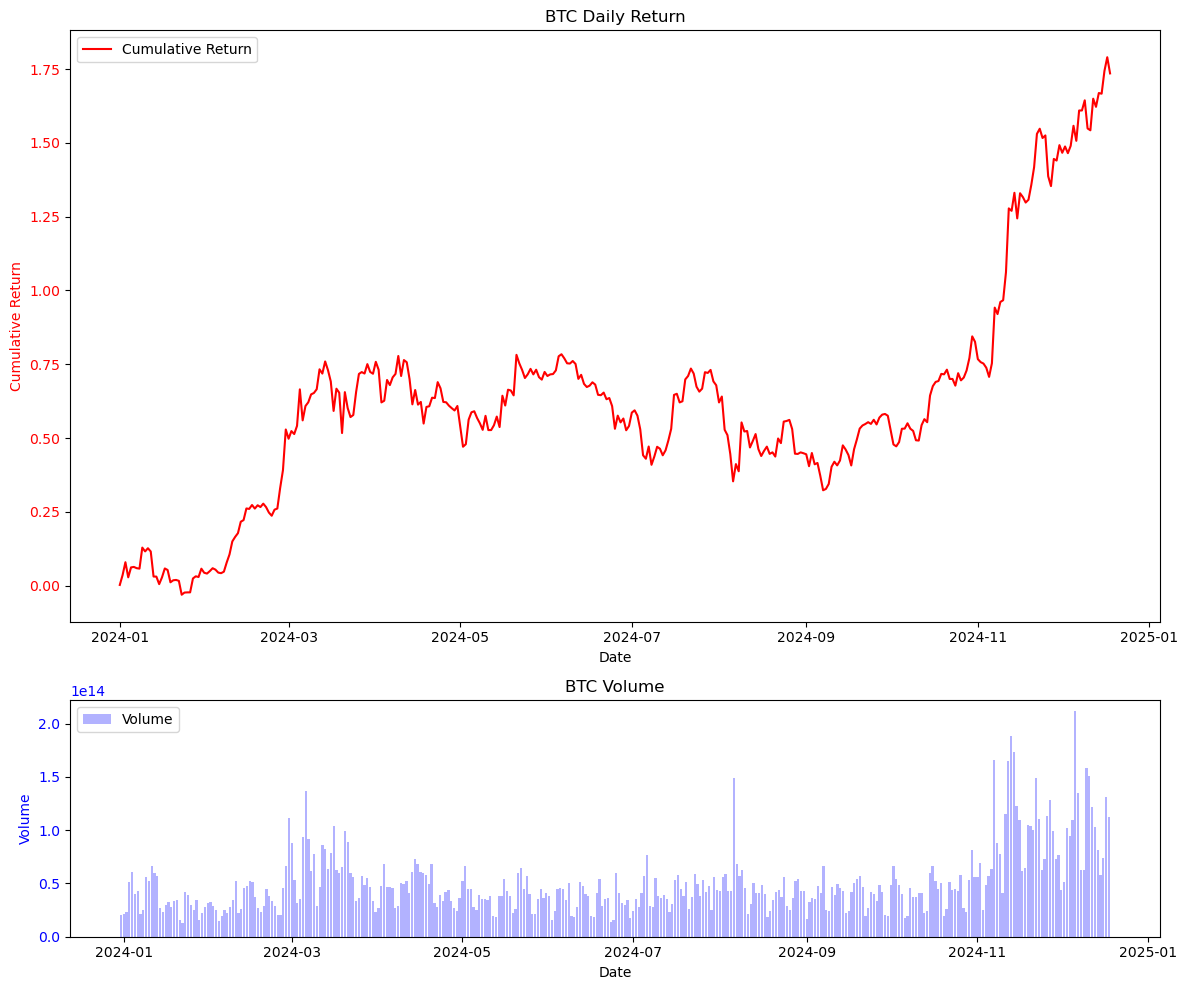

In [10]:
# 일 수익률 계산
df_btc['Daily Return'] = df_btc['Adj Close'].pct_change()
# 누적수익률
df_btc['Cumulative Return'] = (1 + df_btc['Daily Return']).cumprod() - 1

# 차트 그리기
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 0.4])  # 높이 비율 설정

# 상단 그래프: 일일 수익률
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_btc.index, df_btc['Cumulative Return'], color='red', label='Cumulative Return')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')
ax1.set_title('BTC Daily Return')

# 하단 그래프: 거래량
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(df_btc.index, df_btc['Volume'], color='blue', alpha=0.3, label='Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper left')
ax2.set_title('BTC Volume')

# 레이아웃 조정
fig.tight_layout()

# 차트 표시
plt.show()


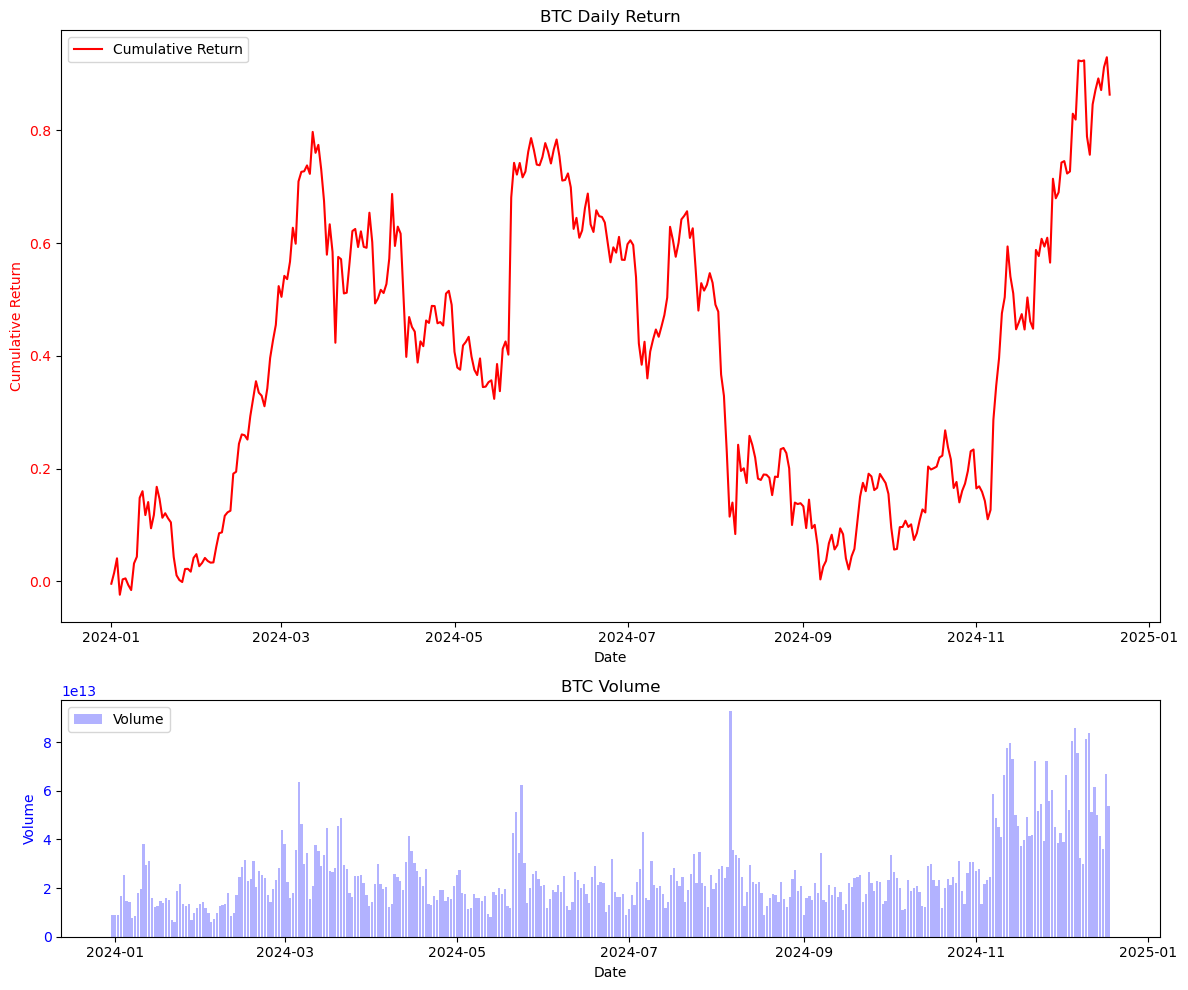

In [11]:
# 일 수익률 계산
df_eth['Daily Return'] = df_eth['Adj Close'].pct_change()
# 누적수익률
df_eth['Cumulative Return'] = (1 + df_eth['Daily Return']).cumprod() - 1

# 차트 그리기
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 0.4])  # 높이 비율 설정

# 상단 그래프: 일일 수익률
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_eth.index, df_eth['Cumulative Return'], color='red', label='Cumulative Return')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')
ax1.set_title('BTC Daily Return')

# 하단 그래프: 거래량
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(df_eth.index, df_eth['Volume'], color='blue', alpha=0.3, label='Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper left')
ax2.set_title('BTC Volume')

# 레이아웃 조정
fig.tight_layout()

# 차트 표시
plt.show()

In [10]:
df_btc = fdr.DataReader('BTC/KRW','20170101','20201231')
df_eth = fdr.DataReader('ETH/KRW','20170101','20201231')

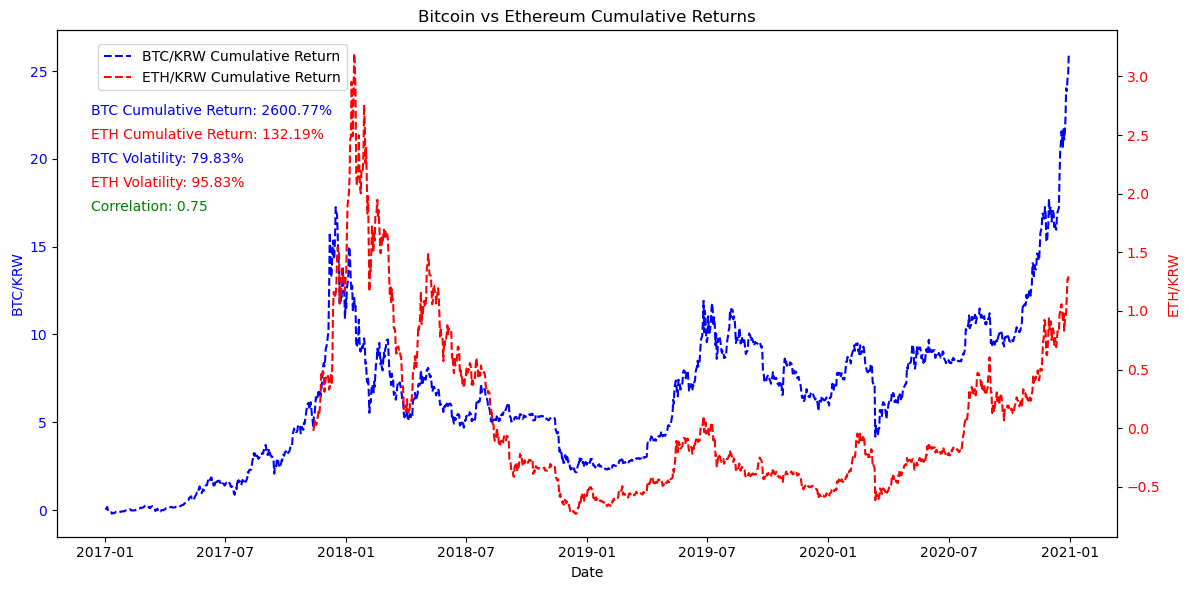

In [4]:
# 일 수익률 계산 및 컬럼 추가
df_btc['Daily Return'] = df_btc['Adj Close'].pct_change()
df_eth['Daily Return'] = df_eth['Adj Close'].pct_change()

# 누적 수익률 계산 및 컬럼 추가
df_btc['Cumulative Return'] = (1 + df_btc['Daily Return']).cumprod() - 1
df_eth['Cumulative Return'] = (1 + df_eth['Daily Return']).cumprod() - 1

# 변동성 계산 (Annualized Volatility)
df_btc_volatility = df_btc['Daily Return'].std() * np.sqrt(365) * 100
df_eth_volatility = df_eth['Daily Return'].std() * np.sqrt(365) * 100

# 일 수익률 상관계수 계산
correlation = df_btc['Daily Return'].corr(df_eth['Daily Return'])

# 차트 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 좌측 축에 비트코인 누적 수익률 플롯
ax1.plot(df_btc.index, df_btc['Cumulative Return'], 'b--', label='BTC/KRW Cumulative Return')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC/KRW', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 우측 축 생성 및 이더리움 누적 수익률 플롯
ax2 = ax1.twinx()
ax2.plot(df_eth.index, df_eth['Cumulative Return'], 'r--', label='ETH/KRW Cumulative Return')
ax2.set_ylabel('ETH/KRW', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 차트 제목 설정
plt.title('Bitcoin vs Ethereum Cumulative Returns')

# 범례 추가
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.08, 0.93))

# 텍스트를 차트 맨 위에 추가
plt.figtext(0.08, 0.8, f'BTC Cumulative Return: {df_btc["Cumulative Return"].iloc[-1]*100:.2f}%', color='blue')
plt.figtext(0.08, 0.76, f'ETH Cumulative Return: {df_eth["Cumulative Return"].iloc[-1]*100:.2f}%', color='red')
plt.figtext(0.08, 0.72, f'BTC Volatility: {df_btc_volatility:.2f}%', color='blue')
plt.figtext(0.08, 0.68, f'ETH Volatility: {df_eth_volatility:.2f}%', color='red')
plt.figtext(0.08, 0.64, f'Correlation: {correlation:.2f}', color='green')

# 차트 표시
plt.show()

In [11]:
df_btc

,Open,High,Low,Close,Volume,Adj Close
2016-12-31,1.158756e+06,1162515.00,1.142604e+06,1.162515e+06,119581719200,1.162515e+06
2017-01-01,1.162412e+06,1209403.50,1.155894e+06,1.202972e+06,178067406890,1.202972e+06
2017-01-02,1.203324e+06,1245300.25,1.203916e+06,1.229053e+06,267264105027,1.229053e+06
2017-01-03,1.228872e+06,1259066.50,1.235421e+06,1.258881e+06,223314459680,1.258881e+06
2017-01-04,1.259557e+06,1385054.75,1.260194e+06,1.379383e+06,412055225187,1.379383e+06
...,...,...,...,...,...,...
2020-12-26,2.714694e+07,29392282.00,2.697717e+07,2.908312e+07,53170261963275,2.908312e+07
2020-12-27,2.908569e+07,31120270.00,2.851738e+07,2.891107e+07,73157088853420,2.891107e+07
2020-12-28,2.892045e+07,30055852.00,2.883992e+07,2.968766e+07,53771095884867,2.968766e+07
2020-12-29,2.968437e+07,29905978.00,2.837567e+07,2.989688e+07,49458705094482,2.989688e+07
